In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression


In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv"
avocado_df = pd.read_csv(url)


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  


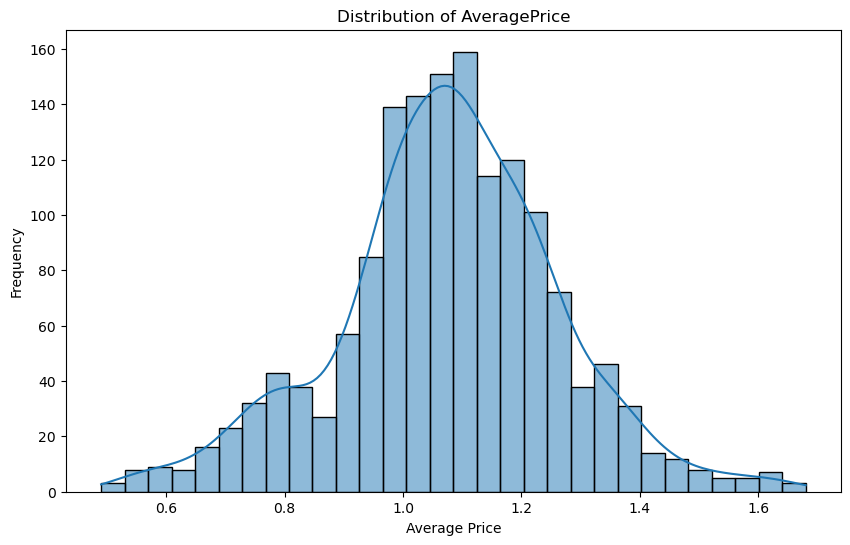

In [3]:
# Display the first few rows of the dataset
print(avocado_df.head())

# Check for missing values
print(avocado_df.isnull().sum())

# Summary statistics
print(avocado_df.describe())

# Visualize the distribution of AveragePrice
plt.figure(figsize=(10, 6))
sns.histplot(avocado_df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of AveragePrice')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


In [6]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'], dayfirst=True)


In [7]:


# For example, you could extract month, day, or year from the date column, or create new features based on existing ones.
avocado_df['Month'] = avocado_df['Date'].dt.month
avocado_df['Day'] = avocado_df['Date'].dt.day
avocado_df['Year'] = avocado_df['Date'].dt.year

# Drop unnecessary columns if any (e.g., 'Date' if you've extracted month, day, and year)
avocado_df.drop('Date', axis=1, inplace=True)


In [9]:
# Split the data into features and target variable
X = avocado_df.drop(['AveragePrice'], axis=1)
y = avocado_df['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}



In [11]:
# Perform one-hot encoding for categorical variables
avocado_df = pd.get_dummies(avocado_df, columns=['type'], drop_first=True)

# Now, 'type' column has been encoded into numerical values
# Proceed with model building and testing


In [13]:
# Split the data into features and target variable
X = avocado_df.drop(['AveragePrice'], axis=1)
y = avocado_df['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}



In [14]:
# Train and test models
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(f"{name}:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared Score:", r2_score(y_test, y_pred))
    print("------------------------------------------")


ValueError: could not convert string to float: 'RichmondNorfolk'

In [15]:
# Assuming 'X_train' and 'X_test' are your feature matrices
from sklearn.preprocessing import OneHotEncoder

# Identify and encode categorical columns
categorical_columns = ['city_column_name']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Drop original categorical columns from X_train and X_test
X_train = X_train.drop(columns=categorical_columns)
X_test = X_test.drop(columns=categorical_columns)

# Concatenate encoded categorical columns with remaining features
X_train = np.concatenate((X_train.values, X_train_encoded), axis=1)
X_test = np.concatenate((X_test.values, X_test_encoded), axis=1)


KeyError: "None of [Index(['city_column_name'], dtype='object')] are in the [columns]"